In [4]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [5]:
#this notebook is used to format and clean up the orignal tracking_week_x.csv files
#so a generic week_df variable is used, care must be taken when exporting the CSV 
#to ensure the correct week is labeled correctly
#this notebook could also contain ways to make CSV files with more specifics to make nalysis more pointed
#and easier down the road
week_df = pd.read_csv('../base_datasets/tracking_week_4.csv')
week_df.head()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022092900,57,42654.0,La'el Collins,1,2022-09-29 20:16:00.099999,71.0,CIN,left,86.21,30.88,0.00,0.00,0.00,262.60,246.29,NaN
1,2022092900,57,42654.0,La'el Collins,2,2022-09-29 20:16:00.200000,71.0,CIN,left,86.21,30.88,0.00,0.00,0.00,263.32,234.76,NaN
2,2022092900,57,42654.0,La'el Collins,3,2022-09-29 20:16:00.299999,71.0,CIN,left,86.21,30.87,0.01,0.23,0.01,263.32,173.85,NaN
3,2022092900,57,42654.0,La'el Collins,4,2022-09-29 20:16:00.400000,71.0,CIN,left,86.21,30.86,0.07,0.69,0.01,263.32,191.83,NaN
4,2022092900,57,42654.0,La'el Collins,5,2022-09-29 20:16:00.500000,71.0,CIN,left,86.21,30.85,0.19,1.01,0.02,263.32,192.85,NaN


In [6]:
week_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418686 entries, 0 to 1418685
Data columns (total 17 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   gameId         1418686 non-null  int64  
 1   playId         1418686 non-null  int64  
 2   nflId          1357004 non-null  float64
 3   displayName    1418686 non-null  object 
 4   frameId        1418686 non-null  int64  
 5   time           1418686 non-null  object 
 6   jerseyNumber   1357004 non-null  float64
 7   club           1418686 non-null  object 
 8   playDirection  1418686 non-null  object 
 9   x              1418686 non-null  float64
 10  y              1418686 non-null  float64
 11  s              1418686 non-null  float64
 12  a              1418686 non-null  float64
 13  dis            1418686 non-null  float64
 14  o              1357361 non-null  float64
 15  dir            1357361 non-null  float64
 16  event          125983 non-null   object 
dtypes: float

In [7]:
#looking at the csv I 
week_df['playId'].nunique()

1219

In [8]:
#jerseyNumber and nflId do not nead to be floats
#however, doing an .astype() conversion threw up a bunch of errors related to NaN values
#so, looking at the csv I found the ball position for the play has NA in the nflId and jerseyNumber fields
# also the nflid in the players csv is datatype int64
# the playId and other identifiers are still intact, so I filled those values with 0 
week_df['jerseyNumber'].fillna(0, inplace=True)  # Replace NaN with 0
week_df['nflId'].fillna(0, inplace=True)  # Replace NaN with 0
week_df['jerseyNumber'] = week_df['jerseyNumber'].astype(int)
week_df['nflId'] = week_df['nflId'].astype(int)

In [9]:
#verify datatypes were changed
week_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418686 entries, 0 to 1418685
Data columns (total 17 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   gameId         1418686 non-null  int64  
 1   playId         1418686 non-null  int64  
 2   nflId          1418686 non-null  int64  
 3   displayName    1418686 non-null  object 
 4   frameId        1418686 non-null  int64  
 5   time           1418686 non-null  object 
 6   jerseyNumber   1418686 non-null  int64  
 7   club           1418686 non-null  object 
 8   playDirection  1418686 non-null  object 
 9   x              1418686 non-null  float64
 10  y              1418686 non-null  float64
 11  s              1418686 non-null  float64
 12  a              1418686 non-null  float64
 13  dis            1418686 non-null  float64
 14  o              1357361 non-null  float64
 15  dir            1357361 non-null  float64
 16  event          125983 non-null   object 
dtypes: float

In [10]:
week_df['event'].value_counts()

event
first_contact                27163
tackle                       27047
ball_snap                    17616
handoff                      16445
pass_outcome_caught          13983
pass_arrived                 12557
out_of_bounds                 4117
run                           2553
touchdown                     1380
man_in_motion                 1081
play_action                    575
shift                          368
fumble                         253
qb_slide                       253
pass_forward                   204
snap_direct                     92
lateral                         92
qb_sack                         92
pass_shovel                     46
line_set                        46
autoevent_passinterrupted        9
autoevent_passforward            9
autoevent_ballsnap               2
Name: count, dtype: int64

In [11]:
cle_wk1_track_df = week_df.loc[week_df['club'] == 'CLE']
cle_wk1_track_df.head()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
182609,2022100201,63,41264,Joel Bitonio,1,2022-10-02 13:03:56.400000,75,CLE,left,87.65,11.34,1.12,2.42,0.11,266.53,178.23,NaN
182610,2022100201,63,41264,Joel Bitonio,2,2022-10-02 13:03:56.500000,75,CLE,left,87.63,11.26,0.78,2.49,0.08,274.95,187.33,NaN
182611,2022100201,63,41264,Joel Bitonio,3,2022-10-02 13:03:56.599999,75,CLE,left,87.61,11.20,0.55,2.41,0.06,280.61,203.48,NaN
182612,2022100201,63,41264,Joel Bitonio,4,2022-10-02 13:03:56.700000,75,CLE,left,87.58,11.16,0.41,2.17,0.05,282.36,230.57,NaN
182613,2022100201,63,41264,Joel Bitonio,5,2022-10-02 13:03:56.799999,75,CLE,left,87.53,11.17,0.47,2.09,0.05,284.85,275.56,pass_arrived


In [12]:
#list of playId numbers
cle_wk1_track_df['playId'].unique()

array([  63,  115,  144,  165,  200,  221,  288,  309,  333,  354,  383,
        426,  472,  493,  517,  545,  655,  676,  716,  749,  778,  831,
        855,  895,  918,  952,  995, 1019, 1040, 1064, 1087, 1108, 1129,
       1152, 1197, 1250, 1340, 1361, 1385, 1409, 1432, 1453, 1474, 1497,
       1528, 1552, 1797, 1881, 1902, 1998, 2105, 2189, 2210, 2231, 2252,
       2299, 2325, 2346, 2367, 2413, 2471, 2492, 2513, 2534, 2555, 2595,
       2616, 2642, 2663, 2753, 2774, 2819, 2843, 2864, 2922, 2943, 2969,
       3001, 3135, 3167, 3188, 3209, 3255, 3317, 3338, 3373, 3399, 3434,
       3542, 3578, 3604, 3658])

In [13]:
#1012 touchdowns for week 1 seemed like a lot, so I looked at my favorite team, and found that each player on the field
#for the team that scored has 'event' equal to touchdown, makes more sense
TD_cle_wk4_df = week_df.loc[(week_df['event'] == 'touchdown') & (week_df['club'] == 'CLE')]
TD_cle_wk4_df.head()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
203280,2022100201,778,44903,John Johnson,62,2022-10-02 13:28:19.099999,43,CLE,right,110.12,46.41,7.07,2.18,0.72,7.92,19.73,touchdown
203346,2022100201,778,45038,Isaac Rochell,62,2022-10-02 13:28:19.099999,98,CLE,right,106.63,44.15,5.75,2.81,0.60,31.47,46.90,touchdown
203478,2022100201,778,46073,Denzel Ward,62,2022-10-02 13:28:19.099999,21,CLE,right,107.70,51.53,7.73,3.34,0.78,39.15,40.90,touchdown
203742,2022100201,778,47863,Sione Takitaki,62,2022-10-02 13:28:19.099999,44,CLE,right,107.19,29.84,0.37,0.23,0.04,12.63,2.99,touchdown
203874,2022100201,778,52452,Grant Delpit,62,2022-10-02 13:28:19.099999,22,CLE,right,108.61,44.90,6.73,2.07,0.68,20.78,24.19,touchdown


In [24]:

chubb_run_df = week_df[week_df['playId'] == 2864]
chubb_run_df.head()


,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
263465,2022100201,2864,41264,Joel Bitonio,1,2022-10-02 15:17:43.200000,75,CLE,left,39.31,28.0,0.00,0.00,0.00,269.96,236.98,NaN
263466,2022100201,2864,41264,Joel Bitonio,2,2022-10-02 15:17:43.299999,75,CLE,left,39.31,28.0,0.00,0.00,0.00,269.06,246.48,man_in_motion
263467,2022100201,2864,41264,Joel Bitonio,3,2022-10-02 15:17:43.400000,75,CLE,left,39.31,28.0,0.01,0.22,0.00,268.19,304.38,NaN
263468,2022100201,2864,41264,Joel Bitonio,4,2022-10-02 15:17:43.500000,75,CLE,left,39.30,28.0,0.05,0.44,0.00,267.27,299.25,NaN
263469,2022100201,2864,41264,Joel Bitonio,5,2022-10-02 15:17:43.599999,75,CLE,left,39.30,28.0,0.09,0.44,0.01,266.46,283.72,NaN


In [33]:
chubb_run_cle_players_df = chubb_run_df.loc[chubb_run_df['club'] == 'CLE']
chubb_run_cle_players_df.head()


,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
263465,2022100201,2864,41264,Joel Bitonio,1,2022-10-02 15:17:43.200000,75,CLE,left,39.31,28.0,0.00,0.00,0.00,269.96,236.98,NaN
263466,2022100201,2864,41264,Joel Bitonio,2,2022-10-02 15:17:43.299999,75,CLE,left,39.31,28.0,0.00,0.00,0.00,269.06,246.48,man_in_motion
263467,2022100201,2864,41264,Joel Bitonio,3,2022-10-02 15:17:43.400000,75,CLE,left,39.31,28.0,0.01,0.22,0.00,268.19,304.38,NaN
263468,2022100201,2864,41264,Joel Bitonio,4,2022-10-02 15:17:43.500000,75,CLE,left,39.30,28.0,0.05,0.44,0.00,267.27,299.25,NaN
263469,2022100201,2864,41264,Joel Bitonio,5,2022-10-02 15:17:43.599999,75,CLE,left,39.30,28.0,0.09,0.44,0.01,266.46,283.72,NaN


In [34]:
chubb_run_atl_players_df = chubb_run_df.loc[chubb_run_df['club'] == 'ATL']
chubb_run_atl_players_df.head()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
263543,2022100201,2864,42480,Grady Jarrett,1,2022-10-02 15:17:43.200000,97,ATL,left,37.17,30.04,0.22,0.68,0.02,71.30,132.68,NaN
263544,2022100201,2864,42480,Grady Jarrett,2,2022-10-02 15:17:43.299999,97,ATL,left,37.19,30.02,0.33,0.68,0.03,71.30,141.13,man_in_motion
263545,2022100201,2864,42480,Grady Jarrett,3,2022-10-02 15:17:43.400000,97,ATL,left,37.21,29.98,0.46,0.72,0.05,74.25,143.55,NaN
263546,2022100201,2864,42480,Grady Jarrett,4,2022-10-02 15:17:43.500000,97,ATL,left,37.25,29.92,0.61,0.80,0.06,76.44,147.76,NaN
263547,2022100201,2864,42480,Grady Jarrett,5,2022-10-02 15:17:43.599999,97,ATL,left,37.29,29.85,0.78,0.84,0.08,78.66,148.47,NaN


In [41]:
chubb_run_frame_1=chubb_run_df.loc[chubb_run_df['frameId'] == 1]
chubb_run_frame_1.reset_index()
chubb_run_frame_1.head()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
263465,2022100201,2864,41264,Joel Bitonio,1,2022-10-02 15:17:43.200000,75,CLE,left,39.31,28.00,0.00,0.00,0.00,269.96,236.98,NaN
263543,2022100201,2864,42480,Grady Jarrett,1,2022-10-02 15:17:43.200000,97,ATL,left,37.17,30.04,0.22,0.68,0.02,71.30,132.68,NaN
263621,2022100201,2864,43297,Jack Conklin,1,2022-10-02 15:17:43.200000,78,CLE,left,39.17,32.84,0.00,0.00,0.00,236.72,175.35,NaN
263699,2022100201,2864,43380,Jacoby Brissett,1,2022-10-02 15:17:43.200000,7,CLE,left,39.61,29.60,0.00,0.00,0.00,272.57,78.55,NaN
263777,2022100201,2864,44841,David Njoku,1,2022-10-02 15:17:43.200000,85,CLE,left,38.91,34.80,0.00,0.00,0.01,269.99,287.10,NaN


In [65]:
chubb_run_frame_1_X = chubb_run_frame_1[['displayName','x']]
chubb_run_frame_1_y = chubb_run_frame_1[['displayName','y']]
chubb_run_frame_1_xy = chubb_run_frame_1[['displayName','jerseyNumber','club','x','y']]
chubb_run_frame_1_xy .head(23)

,displayName,jerseyNumber,club,x,y
263465,Joel Bitonio,75,CLE,39.31,28.000000
263543,Grady Jarrett,97,ATL,37.17,30.040000
263621,Jack Conklin,78,CLE,39.17,32.840000
263699,Jacoby Brissett,7,CLE,39.61,29.600000
263777,David Njoku,85,CLE,38.91,34.800000
263855,Ethan Pocic,55,CLE,38.57,29.770000
263933,Kareem Hunt,27,CLE,41.02,22.820000
264011,Rashaan Evans,54,ATL,32.01,30.300000
264089,Nick Chubb,24,CLE,46.19,29.940000
264167,Lorenzo Carter,9,ATL,37.23,36.140000


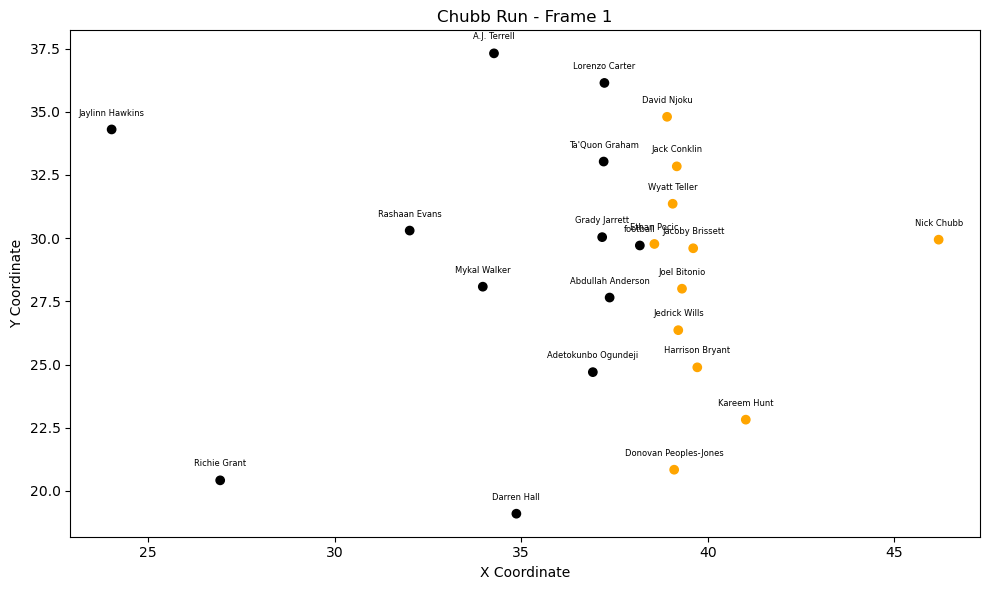

In [68]:
import matplotlib.pyplot as plt
import numpy as np  # Import NumPy for data manipulation

# Assuming you have already created the chubb_run_frame_1_xy DataFrame

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size

# Define an array of colors based on a condition (e.g., based on a column value)
# In this example, we set a different color for points where 'displayName' is 'Nick Chubb'
colors = np.where(chubb_run_frame_1_xy['club'] == 'CLE', 'orange', 'black')

# Use the 'colors' array to set the color of each point
plt.scatter(chubb_run_frame_1_xy['x'], chubb_run_frame_1_xy['y'], marker='o', c=colors)


# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Chubb Run - Frame 1')

# Annotate player names with custom font size
for i, row in chubb_run_frame_1_xy.iterrows():
    plt.annotate(row['displayName'], (row['x'], row['y']), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=6)  # Adjust fontsize as needed

# Show the plot
plt.grid(False)  # Remove grid
plt.tight_layout()  # Ensure tight layout to prevent cutoff labels
plt.show()


In [74]:
chubb_run_plot=chubb_run_df.loc[chubb_run_df['club'] == 'CLE']
chubb_run_plot.reset_index()
chubb_run_plot.head()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
263465,2022100201,2864,41264,Joel Bitonio,1,2022-10-02 15:17:43.200000,75,CLE,left,39.31,28.0,0.00,0.00,0.00,269.96,236.98,NaN
263466,2022100201,2864,41264,Joel Bitonio,2,2022-10-02 15:17:43.299999,75,CLE,left,39.31,28.0,0.00,0.00,0.00,269.06,246.48,man_in_motion
263467,2022100201,2864,41264,Joel Bitonio,3,2022-10-02 15:17:43.400000,75,CLE,left,39.31,28.0,0.01,0.22,0.00,268.19,304.38,NaN
263468,2022100201,2864,41264,Joel Bitonio,4,2022-10-02 15:17:43.500000,75,CLE,left,39.30,28.0,0.05,0.44,0.00,267.27,299.25,NaN
263469,2022100201,2864,41264,Joel Bitonio,5,2022-10-02 15:17:43.599999,75,CLE,left,39.30,28.0,0.09,0.44,0.01,266.46,283.72,NaN


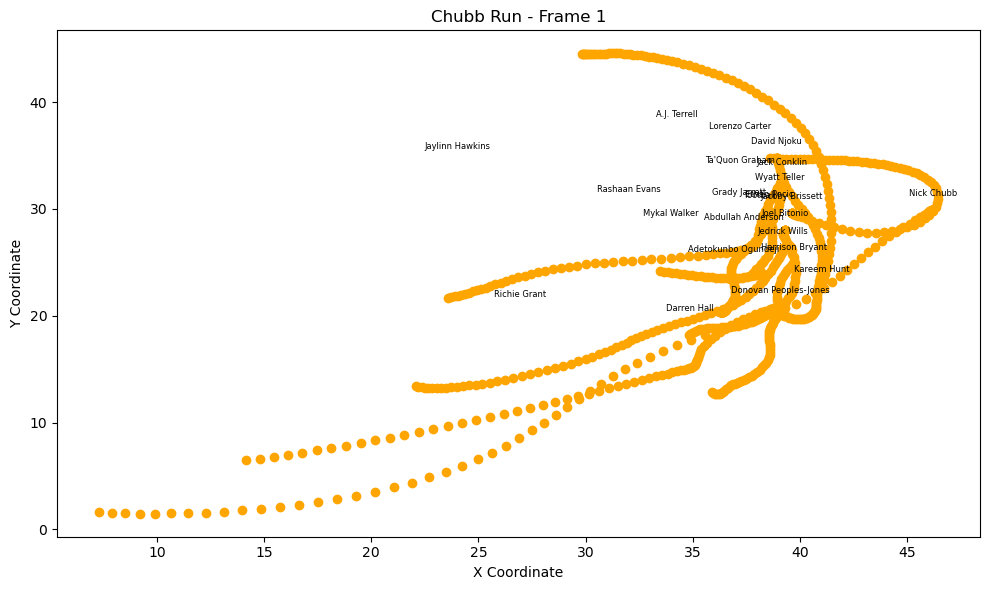

In [75]:
plt.figure(figsize=(10, 6))  # Optional: Set the figure size

# Define an array of colors based on a condition (e.g., based on a column value)
# In this example, we set a different color for points where 'displayName' is 'Nick Chubb'

# Use the 'colors' array to set the color of each point
plt.scatter(chubb_run_plot['x'], chubb_run_plot['y'], marker='o', c='orange')


# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Chubb Run - Frame 1')

# Annotate player names with custom font size
for i, row in chubb_run_frame_1_xy.iterrows():
    plt.annotate(row['displayName'], (row['x'], row['y']), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=6)  # Adjust fontsize as needed

# Show the plot
plt.grid(False)  # Remove grid
plt.tight_layout()  # Ensure tight layout to prevent cutoff labels
plt.show()


In [79]:
chubb_run_players_plot=chubb_run_df[['displayName','jerseyNumber','club','x','y']]
chubb_run_players_plot.head()


,displayName,jerseyNumber,club,x,y
263465,Joel Bitonio,75,CLE,39.31,28.0
263466,Joel Bitonio,75,CLE,39.31,28.0
263467,Joel Bitonio,75,CLE,39.31,28.0
263468,Joel Bitonio,75,CLE,39.30,28.0
263469,Joel Bitonio,75,CLE,39.30,28.0


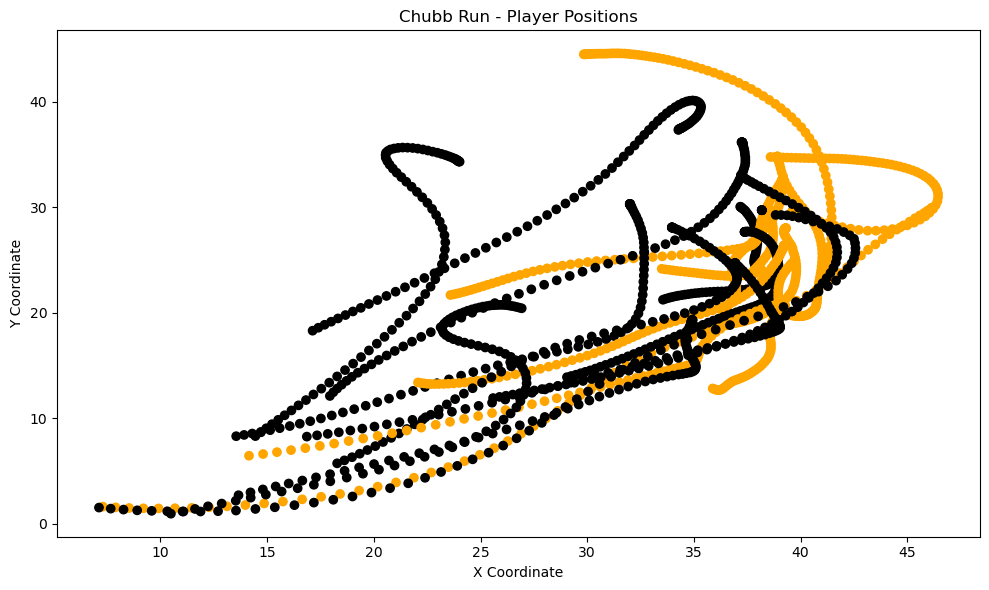

In [88]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already created the DataFrame 'chubb_run_players_plot'

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size

# Define an array of colors based on multiple conditions
# In this example, we set colors based on 'club' and 'displayName'
colors = np.where((chubb_run_players_plot['club'] == 'CLE') | (chubb_run_players_plot['displayName'] == 'Nick Chubb'),
                   'orange',  # Color for CLE club and Nick Chubb
                   'black')  # Default color for others

# Use the 'colors' array to set the color of each point
plt.scatter(chubb_run_players_plot['x'], chubb_run_players_plot['y'], marker='o', c=colors)

# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Chubb Run - Player Positions')

# Show the plot
plt.grid(False)  # Remove grid
plt.tight_layout()
plt.show()
